# Домашнее задание
* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Реализовать самостоятельно логистическую регрессию
    * Обучить ее методом градиентного спуска
    * Методом nesterov momentum
    * Методом rmsprop
* В качестве dataset'а взять Iris, оставив 2 класса:
    * Iris Versicolor
    * Iris Virginica

In [7]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
iris = datasets.load_iris()

In [9]:
df = pd.concat([pd.DataFrame(iris.data), pd.Series(iris.target)], axis=1)
df.columns=['s_length', 's_width', 'p_length', 'p_width', 'target']
df

,s_length,s_width,p_length,p_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
# Оставим данные только по 2м классам ирисов
df = df[df.target!=2]
df

,s_length,s_width,p_length,p_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [11]:
X = df.iloc[:, :-1]
Y = df.target

In [12]:
# применим логистическую регрессию из пакета, чтобы посмотреть, какие коэффициенты мы получим с её помощью
log_r = LogisticRegression()

In [13]:
log_r.fit(X, Y)

LogisticRegression()

In [14]:
# коэффициенты 
print(f'coef: {log_r.intercept_}{log_r.coef_}')

coef: [-6.61165119][[ 0.44036482 -0.90696813  2.30849566  0.96232763]]


### Обучение логистической регрессии методом градиентного спуска

In [15]:
# Добавим к признакам столбец, заполненный 1, чтобы использовать его для расчета свободного члена w0 
X_upd = np.c_[np.ones(X.shape[0]), X]

In [16]:
X_upd[:5]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2]])

In [17]:
def sigmoid(x):
    '''Возвращает сигмоид от переданного значения'''
    return 1 / (1 + np.exp(-x))

In [18]:
def predict(X, coefficients):
    '''Возвращает предсказываемое значение Y при текущих коэффициентах'''
    return sigmoid(np.dot(X, coefficients))


Для задачи бинарной классификации используется loss-функция кросс-энтропия. 

$$J = -\sum_{i=1}^{N} y_i\log (h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))$$

In [19]:
def loss_func(X, y, coef):
    '''Функция потерь'''
    total_cost = 0
    for i in range(len(X)):
        y_pred = predict(X[i], coef)
        total_cost -= (y[i]*np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred))
    return total_cost

Для расчета частных произодных функции потерь используем формулу
$$\frac{d Loss}{d w_i} = - (y_i - \sigma(w*x_i))x_{ij}$$


In [20]:
def update_coef(X, y, coefficients):
    '''Пересчет коэффициентов'''
    yhat = predict(X, coefficients)
    N, M = X.shape
    for i in range(len(coefficients)):
        c_i = coefficients[i]
        dt = -(np.dot(y - yhat, X[:, i])) / N
        c_i -= lr*dt
        np.put(coefficients, [i], c_i)
    return coefficients
        

In [21]:
# Градиентный спуск
lr = 0.3
n_epoch = 200
coef = np.ones(X_upd.shape[1])
costs_grad = list()
for epoch in range(n_epoch):
    coef = update_coef(X_upd, Y, coef)
    costs_grad.append(loss_func(X_upd, Y, coef))
    print(f'coef: {coef},\ncost={loss_func(X_upd, Y, coef)}\n')
    
    
    

coef: [0.85000301 0.2491144  0.48580951 0.78070437 0.96310073],
cost=257.3647247788016

coef: [ 0.70098331 -0.49694106 -0.0251737   0.5629254   0.92647188],
cost=30.743062114644623

coef: [ 0.68749441 -0.5334114  -0.09267785  0.63139764  0.95686628],
cost=27.399040294148673

coef: [ 0.68564875 -0.50943587 -0.12157136  0.72300139  0.99251272],
cost=24.81219462111189

coef: [ 0.66791835 -0.57572476 -0.197343    0.75998775  1.01223269],
cost=22.790735534851905

coef: [ 0.67413402 -0.51289873 -0.19755546  0.85918183  1.04831781],
cost=21.219301106731926

coef: [ 0.65174101 -0.60889202 -0.28454156  0.87047587  1.05969243],
cost=19.63430479901813

coef: [ 0.66216751 -0.52691428 -0.26913439  0.9705969   1.09485441],
cost=18.245293360745748

coef: [ 0.64078951 -0.62069042 -0.35041772  0.97483687  1.10323371],
cost=16.602529161532185

coef: [ 0.64813907 -0.55923777 -0.34206603  1.05577234  1.13203452],
cost=15.285940680569597

coef: [ 0.63383137 -0.61768481 -0.39916564  1.07045435  1.14222253],


coef: [ 0.49827231 -0.79889098 -1.18247705  2.24965094  1.64725149],
cost=2.3400886947209267

coef: [ 0.49754139 -0.79993879 -1.18665489  2.25584102  1.64996127],
cost=2.318609575228855

coef: [ 0.49681756 -0.80097648 -1.19079258  2.26197205  1.65264581],
cost=2.2975372365396582

coef: [ 0.49610067 -0.80200425 -1.19489088  2.26804516  1.65530559],
cost=2.2768601215308277

coef: [ 0.49539059 -0.80302228 -1.19895055  2.27406143  1.65794106],
cost=2.2565671082314998

coef: [ 0.49468719 -0.80403076 -1.20297232  2.28002195  1.6605527 ],
cost=2.236647489507038

coef: [ 0.49399035 -0.80502987 -1.20695688  2.28592774  1.66314092],
cost=2.2170909538716503

coef: [ 0.49329994 -0.80601979 -1.21090494  2.29177983  1.66570617],
cost=2.197887567356651

coef: [ 0.49261586 -0.80700067 -1.21481716  2.29757919  1.66824886],
cost=2.1790277563672173

coef: [ 0.49193797 -0.80797269 -1.2186942   2.30332677  1.6707694 ],
cost=2.1605022914653507

coef: [ 0.49126617 -0.80893601 -1.22253668  2.30902351  1.6732

При заданных произвольно количестве эпох = 200 и learning rate = 0.3, получаю набор коэффициентов  
coef: [ 0.44598779 -0.87398429 -1.48226744  2.69499485  1.84386861]  

и значение функции потерь = 1.2160819354841683


В случае с использованием логистической регрессии из пакета набор коэффициентов получался следующий:  
[-6.61165119 0.44036482 -0.90696813  2.30849566  0.96232763]]

Попробуем подставить эти коэффициенты в ручную loss-функцию

In [22]:
coef_logr = [-6.61165119, 0.44036482, -0.90696813, 2.30849566, 0.96232763]
loss_func(X_upd, Y, coef_logr)

2.2578763991737665

Получили значение большее, чем при ручном градиентном спуске. Т.к. мы хотим минимизировать loss, результат для ручного градиента сочтем приемлемым.  

### Реализация с использованием Nesterov momentum 

Для этого используем формулу:


$$v_t = \gamma*v_{t-1} + lr*\nabla_\theta*J(\theta - \gamma v_{t-1})$$
при этом $\theta = \theta - v_t$

In [32]:
def update_coef_nesterov(X, y, coefficients, v_pred, gamma):
    '''Пересчет коэффициентов '''
    yhat = predict(X, coefficients - gamma*v_pred)
    N, M = X.shape
    for i in range(len(coefficients)):
        c_i = coefficients[i]
        v_i = -(gamma*v_pred[i] + lr*np.dot(y - yhat, X[:, i])) / N
        c_i -= v_i
        np.put(coefficients, [i], c_i)
        np.put(v_pred, [i], v_i)
    return coefficients, v_pred

In [33]:
# градиентный спуск с nesterov momentum
lr = 0.3
n_epoch = 200
gamma = 0.9
v_pred = np.zeros(X_upd.shape[1])
coef = np.ones(X_upd.shape[1])
costs_nest = list()
for epoch in range(n_epoch):
    coef, v_pred = update_coef_nesterov(X_upd, Y, coef, v_pred, gamma)
    costs_nest.append(loss_func(X_upd, Y, coef))
    print(f'coef: {coef},\ncost={loss_func(X_upd, Y, coef)}\n')
    



coef: [0.85000301 0.2491144  0.48580951 0.78070437 0.96310073],
cost=257.3647247788016

coef: [0.80505443 0.04208406 0.31915143 0.76575979 0.97139   ],
cost=175.08924441544664

coef: [ 0.6754353  -0.60633247 -0.12648837  0.57864918  0.94036811],
cost=33.8559223246319

coef: [0.82519117 0.28207943 0.28905287 1.21424758 1.1380144 ],
cost=264.4419590118188

coef: [ 0.67384529 -0.47680714 -0.22888086  0.98922984  1.099336  ],
cost=22.257435865899915

coef: [0.82006519 0.39092694 0.17709772 1.60931521 1.29208152],
cost=302.87011404957013

coef: [ 0.66875028 -0.3677776  -0.34075266  1.38443589  1.25344704],
cost=35.499750661207095

coef: [ 0.7853033   0.32513789 -0.0168915   1.8767675   1.40617765],
cost=272.4774640023014

coef: [ 0.63426059 -0.43196832 -0.5339858   1.65304503  1.36790439],
cost=22.999439074587862

coef: [ 0.74080787  0.20091715 -0.23762521  2.10041635  1.50650112],
cost=219.36138283701104

coef: [ 0.58987567 -0.55554972 -0.75440398  1.87712636  1.4683594 ],
cost=9.843478316


coef: [ 0.32288885 -1.07344445 -2.22572608  3.86679409  2.3242103 ],
cost=0.2483526077903739

coef: [ 0.32278187 -1.07375716 -2.2262306   3.86726871  2.3244544 ],
cost=0.2481340370842879

coef: [ 0.32267622 -1.07406319 -2.22673107  3.86774604  2.32469916],
cost=0.24791736044631127

coef: [ 0.32257187 -1.07436275 -2.22722762  3.868226    2.32494456],
cost=0.24770248120997787

coef: [ 0.32246877 -1.07465604 -2.22772036  3.86870848  2.32519056],
cost=0.24748930857865373

coef: [ 0.32236688 -1.07494326 -2.22820939  3.8691934   2.32543714],
cost=0.24727775726366424

coef: [ 0.32226618 -1.07522458 -2.22869484  3.86968068  2.32568428],
cost=0.24706774714494822

coef: [ 0.32216663 -1.07550019 -2.22917679  3.87017021  2.32593195],
cost=0.24685920295278868

coef: [ 0.32206818 -1.07577026 -2.22965535  3.87066193  2.32618013],
cost=0.24665205396930223

coef: [ 0.32197081 -1.07603497 -2.23013061  3.87115574  2.32642881],
cost=0.2464462337484664

coef: [ 0.32187449 -1.07629448 -2.23060268  3.871651

coef: [ 0.3158682  -1.08866937 -2.26312556  3.91443394  2.34731255],
cost=0.23161179942379706

coef: [ 0.31580491 -1.08877345 -2.26348965  3.91496705  2.34756552],
cost=0.23144505856332367

coef: [ 0.31574175 -1.08887707 -2.26385325  3.91549995  2.34781835],
cost=0.23127857632043863

coef: [ 0.31567871 -1.08898022 -2.26421636  3.91603263  2.34807106],
cost=0.23111235175682546

coef: [ 0.31561578 -1.08908294 -2.26457898  3.91656509  2.34832362],
cost=0.23094638395656164

coef: [ 0.31555298 -1.08918522 -2.26494113  3.91709732  2.34857605],
cost=0.23078067202491537

coef: [ 0.31549029 -1.08928707 -2.2653028   3.91762931  2.34882835],
cost=0.23061521508719715

coef: [ 0.31542771 -1.08938852 -2.26566401  3.91816108  2.3490805 ],
cost=0.2304500122876914

coef: [ 0.31536525 -1.08948956 -2.26602477  3.9186926   2.34933252],
cost=0.23028506278864144

coef: [ 0.31530289 -1.08959021 -2.26638506  3.91922387  2.3495844 ],
cost=0.23012036576929545

coef: [ 0.31524064 -1.08969048 -2.26674491  3.91975

Количество и эпох и learning rate такие же, как при простом градиентном спуске. Видим, что после выполнения такого же числа итераций, получаем меньшее значение loss-функции cost=0.2284871119084325, следовательно, модификация алгоритма действительно ускорила градиентный спуск 

### Реализация с использованием RMSProp

$E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma){g^2}_t$

$\theta_{t+1} = \theta_t - \frac{lr}{\sqrt{E[g^2]_t+\epsilon}}g_t$

In [79]:
def update_coef_rmsprop(X, y, coefficients, gamma, eps, gt):
    '''Пересчет коэффициентов '''
    yhat = predict(X, coefficients)
    N, M = X.shape
    gt_prev = gt 
    
    for i in range(len(gt)):
        gt_i = -(np.dot(y - yhat, X[:, i])) / N
        np.put(gt, [i], gt_i)
        
    egt = gamma*np.mean(gt_prev**2) + (1-gamma)*(gt**2) 
    coefficients -= (lr/np.sqrt(egt + eps))*gt

    return coefficients, gt

In [80]:
# градиентный спуск с RMSProp
lr = 0.3
n_epoch = 200
gamma = 0.9
epsilon=1e-5
gt = np.zeros(X_upd.shape[1])
coef = np.ones(X_upd.shape[1])
costs_rmsprop = list()
for epoch in range(n_epoch):
    coef, gt = update_coef_rmsprop(X_upd, Y, coef, gamma, epsilon, gt)
    costs_rmsprop.append(loss_func(X_upd, Y, coef))
    print(f'coef: {coef},\ncost={loss_func(X_upd, Y, coef)}\n')


coef: [0.888978   0.51799231 0.64467733 0.83893548 0.97251116],
cost=357.9340128970679

coef: [0.77795883 0.03598621 0.2893477  0.67788009 0.94502472],
cost=160.9346454248966

coef: [ 0.66695358 -0.44596233 -0.06637621  0.51758874  0.91782103],
cost=31.417846644721905

coef: [ 0.58491309 -0.64439827 -0.45445879  0.94380131  1.12120107],
cost=20.329847381912703

coef: [ 0.6651706  -0.1969262  -0.25559116  1.32758098  1.25575704],
cost=68.16712679527411

coef: [ 0.55401169 -0.67889174 -0.61085057  1.16623461  1.22818405],
cost=14.439734306211747

coef: [ 0.63523835 -0.22992013 -0.40887174  1.54693118  1.36121986],
cost=55.238921025419394

coef: [ 0.52394011 -0.71195515 -0.76361864  1.38465099  1.33334825],
cost=10.237023129541337

coef: [ 0.60589766 -0.26206767 -0.5599115   1.76339921  1.46558497],
cost=44.17206286535263

coef: [ 0.4944064  -0.74419581 -0.91404988  1.60008976  1.43740189],
cost=7.269752433868548

coef: [ 0.57698424 -0.29371237 -0.70934388  1.97747452  1.56925067],
cost=3


coef: [-0.04151029 -1.32815822 -3.71964798  5.8707893   3.59393296],
cost=0.016711179282357765

coef: [-0.0427666  -1.33026289 -3.72628098  5.88177772  3.59954376],
cost=0.016499367845068686

coef: [-0.04400674 -1.33234145 -3.73282329  5.89262133  3.60508267],
cost=0.01629309792704446

coef: [-0.04523117 -1.33439458 -3.73927736  5.90332401  3.61055156],
cost=0.01609215115156863

coef: [-0.04644027 -1.33642293 -3.74564554  5.91388947  3.61595227],
cost=0.015896320572099484

coef: [-0.04763447 -1.33842713 -3.75193012  5.92432129  3.62128653],
cost=0.015705409929808484

coef: [-0.04881413 -1.3404078  -3.75813326  5.93462289  3.62655603],
cost=0.015519232968487368

coef: [-0.04997962 -1.3423655  -3.76425706  5.94479758  3.63176237],
cost=0.015337612801681222

coef: [-0.05113129 -1.34430081 -3.77030354  5.95484853  3.63690712],
cost=0.01516038132747677

coef: [-0.05226949 -1.34621427 -3.77627464  5.96477881  3.64199177],
cost=0.014987378686757412

coef: [-0.05339454 -1.34810639 -3.78217221


coef: [-0.12302219 -1.46664084 -4.13806405  6.57551994  3.9577173 ],
cost=0.007479287011916442

coef: [-0.12358165 -1.46760423 -4.14084927  6.58029444  3.96020731],
cost=0.007439346346044837

coef: [-0.12413813 -1.46856265 -4.14361845  6.58504259  3.96268389],
cost=0.0073998461636258965

coef: [-0.12469167 -1.46951616 -4.14637177  6.58976468  3.96514719],
cost=0.007360779109900877

coef: [-0.12524228 -1.4704648  -4.1491094   6.59446102  3.96759736],
cost=0.007322137994248596

coef: [-0.12579001 -1.47140863 -4.15183154  6.59913188  3.97003453],
cost=0.007283915785612921



Этим методом удалось еще сильнее минимизировать loss и получить значение cost=0.007283915785612921

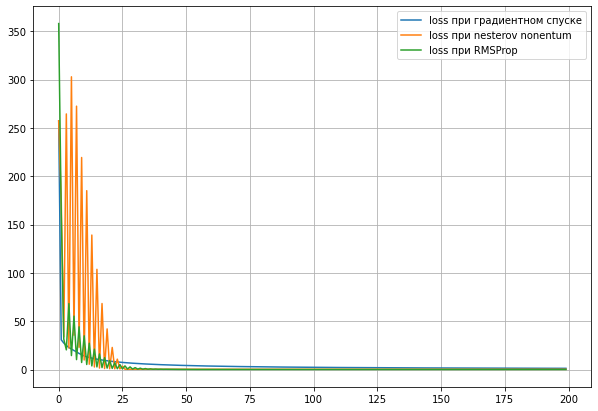

In [81]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(costs_grad, label='loss при градиентном спуске')
plt.plot(costs_nest, label='loss при nesterov nonentum')
plt.plot(costs_rmsprop, label='loss при RMSProp')
plt.legend()

Поведение loss-функции на 1х итерациях при RMSProp и Nesterov колеблющееся, но оно быстрее приближается к 0, чем при обычном градиентном спуске